# Extract audio files and Features (MFCC)

In [2]:
import os
import librosa
import pandas as pd

# Define the root folder path
root_folder = r"D:\audio attendance\50_speakers_audio_data"

# Initialize a list to store data
data = []

# Loop through each subfolder (speaker class)
for folder in os.listdir(root_folder):
    folder_path = os.path.join(root_folder, folder)

    # Check if it is a directory
    if os.path.isdir(folder_path):
        # Loop through each audio file in the subfolder
        for file in os.listdir(folder_path):
            if file.endswith((".wav", ".mp3", ".flac")):  # Filter audio formats
                file_path = os.path.join(folder_path, file)

                # Load audio file using librosa
                try:
                    y, sr = librosa.load(file_path, sr=None)  # Load with original sampling rate

                    # Extract features (you can modify as needed)
                    duration = librosa.get_duration(y=y, sr=sr)  # Get duration in seconds
                    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)  # Extract MFCC features
                    mfcc_mean = mfccs.mean(axis=1)  # Take mean of MFCC coefficients

                    # Append to list
                    data.append([file_path, folder, duration, *mfcc_mean])

                except Exception as e:
                    print(f"Error loading {file_path}: {e}")

# Create DataFrame with column names
columns = ["file_path", "class", "duration"] + [f"mfcc_{i}" for i in range(13)]
df = pd.DataFrame(data, columns=columns)



In [3]:
df

,file_path,class,duration,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12
0,D:\audio attendance\50_speakers_audio_data\Spe...,Speaker0026,60.000363,-385.167267,71.945778,7.416479,22.169682,2.379256,9.548486,-16.423449,-10.821860,-17.446379,-1.855933,-17.694895,-0.162680,-6.804636
1,D:\audio attendance\50_speakers_audio_data\Spe...,Speaker0026,60.000363,-359.468109,81.225883,6.167888,23.608013,5.011143,10.047378,-18.294519,-11.938033,-17.737564,-4.367526,-17.874653,-1.080389,-6.849899
2,D:\audio attendance\50_speakers_audio_data\Spe...,Speaker0026,60.000363,-375.844147,70.308670,7.219227,24.220108,6.313218,8.402315,-15.429453,-13.791598,-16.014482,-3.961123,-17.365173,-0.910400,-6.095363
3,D:\audio attendance\50_speakers_audio_data\Spe...,Speaker0026,60.000363,-371.415771,80.816330,4.078809,24.817572,5.733252,9.490035,-17.379629,-11.705591,-15.359835,-2.441326,-18.184998,-1.233008,-7.382297
4,D:\audio attendance\50_speakers_audio_data\Spe...,Speaker0026,60.000363,-374.231323,80.682823,7.618083,24.336998,5.590209,7.860325,-15.426756,-11.612129,-16.189367,-4.774430,-17.243368,-1.002590,-7.214635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2506,D:\audio attendance\50_speakers_audio_data\Spe...,Speaker_0025,59.979312,-404.783752,125.591782,28.874142,22.652927,11.957054,1.263152,-0.319535,-27.392300,-15.869143,0.259584,-6.983346,-6.972144,1.864323
2507,D:\audio attendance\50_speakers_audio_data\Spe...,Speaker_0025,59.979312,-401.892639,121.440468,17.508522,28.855478,14.743353,-3.015809,-1.391008,-26.686771,-17.978512,-0.996318,-8.862657,-5.654663,3.387459
2508,D:\audio attendance\50_speakers_audio_data\Spe...,Speaker_0025,59.979312,-399.954071,119.261322,21.856899,31.115749,13.957413,-5.903419,-5.331619,-25.455614,-16.366066,-4.360890,-5.656926,-1.892115,-0.905001
2509,D:\audio attendance\50_speakers_audio_data\Spe...,Speaker_0025,59.953187,-395.884949,122.385361,23.254179,31.008137,18.097845,-9.578024,-12.462729,-23.028337,-13.230163,-6.857827,-4.152728,0.076622,-3.320153


#  Spectogram of sample audio

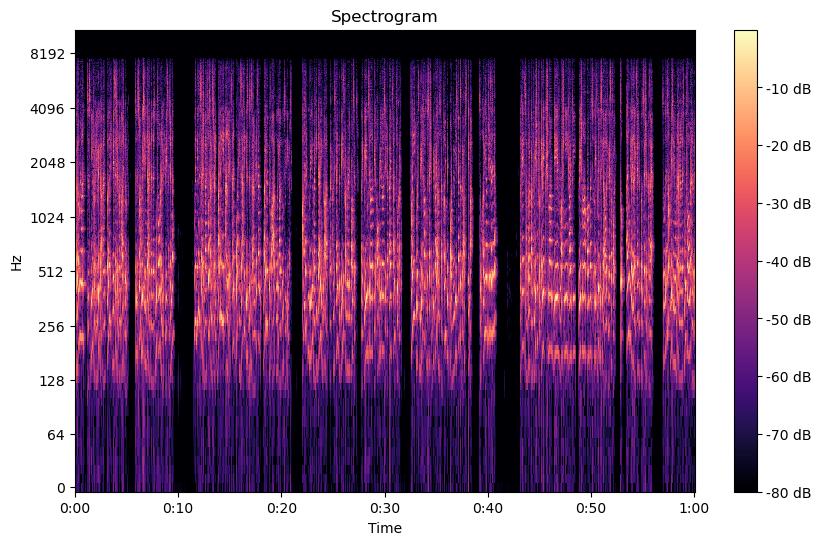

In [5]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
# Load the audio file
audio_path = r'D:\audio attendance\50_speakers_audio_data\Speaker_0000\Speaker_0000_00000.wav'  # Replace with your audio file path
y, sr = librosa.load(audio_path)

# Generate the spectrogram (Short-Time Fourier Transform)
D = librosa.stft(y)

# Convert amplitude to decibels
DB = librosa.amplitude_to_db(abs(D), ref=np.max)

# Plot the spectrogram
plt.figure(figsize=(10, 6))
librosa.display.specshow(DB, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.show()


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import numpy as np

In [7]:
# Extract features (MFCCs) and labels (class)
X = df.iloc[:, 3:].values  # MFCC columns from index 3 to the end
y = df['class'].values

# Normalize the features (MFCCs)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Encode the labels (class) into numerical values
encoder = LabelEncoder()
y = encoder.fit_transform(y)

# Reshape X for CNN input (1D)
X = X.reshape(X.shape[0], X.shape[1], 1)  # (num_samples, num_features, 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

# Build the CNN model
model = Sequential()

# Add 1D convolutional layers with MaxPooling
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))

# Add another convolutional layer
model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))

# Flatten the output from the convolutional layers
model.add(Flatten())

# Add a fully connected layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Dropout to avoid overfitting

# Output layer (using softmax for multi-class classification)
model.add(Dense(len(np.unique(y)), activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


C:\Users\datapro\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
# Train the CNN model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc:.4f}')


Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0668 - loss: 3.7611 - val_accuracy: 0.2227 - val_loss: 3.0076
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2109 - loss: 2.8688 - val_accuracy: 0.4950 - val_loss: 2.0017
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4322 - loss: 1.9899 - val_accuracy: 0.7097 - val_loss: 1.2686
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6276 - loss: 1.3152 - val_accuracy: 0.8310 - val_loss: 0.8354
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7313 - loss: 0.9321 - val_accuracy: 0.8907 - val_loss: 0.5976
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7941 - loss: 0.7705 - val_accuracy: 0.8926 - val_loss: 0.4920
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8397 - loss: 0.5620 - val_accuracy: 0.9085 - val_loss: 0.3904
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8721 - loss: 0.4634 - val_accuracy: 0.9046 - val_loss:

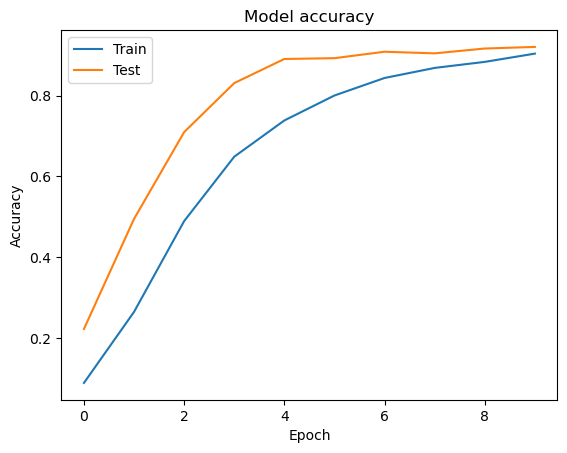

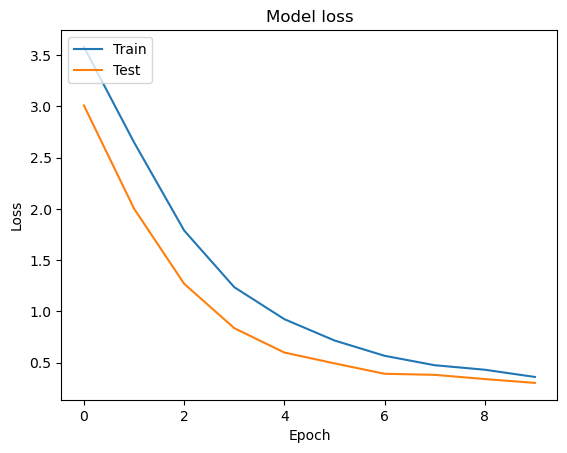

In [10]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [11]:
from sklearn.metrics import classification_report

# Get predictions on the test set
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)  # Convert predicted probabilities to class labels

# Generate classification report
report = classification_report(y_test, y_pred, target_names=encoder.classes_)
print(report)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
              precision    recall  f1-score   support

 Speaker0026       1.00      0.75      0.86         4
 Speaker0027       0.90      1.00      0.95         9
 Speaker0028       1.00      1.00      1.00        10
 Speaker0029       1.00      0.88      0.93         8
 Speaker0030       1.00      1.00      1.00         8
 Speaker0031       1.00      0.93      0.96        14
 Speaker0032       1.00      0.80      0.89         5
 Speaker0033       1.00      1.00      1.00         6
 Speaker0034       1.00      1.00      1.00         5
 Speaker0035       1.00      1.00      1.00         2
 Speaker0036       1.00      0.89      0.94         9
 Speaker0037       0.90      1.00      0.95        18
 Speaker0038       0.60      0.86      0.71         7
 Speaker0039       1.00      1.00      1.00        11
 Speaker0040       1.00      1.00      1.00         5
 Speaker0041       0.25      0.20      0.22         5
 Speaker0042       1.00      1.00      1.0

C:\Users\datapro\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\datapro\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\datapro\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

In [12]:
from sklearn.metrics import classification_report

# Get predictions on the test set
y_pred = model.predict(X_train)
y_pred = np.argmax(y_pred, axis=1)  # Convert predicted probabilities to class labels

# Generate classification report
report = classification_report(y_train, y_pred, target_names=encoder.classes_)
print(report)


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 859us/step
              precision    recall  f1-score   support

 Speaker0026       1.00      1.00      1.00        41
 Speaker0027       0.97      0.97      0.97        38
 Speaker0028       1.00      1.00      1.00        49
 Speaker0029       1.00      0.96      0.98        23
 Speaker0030       1.00      0.96      0.98        25
 Speaker0031       0.97      1.00      0.99        33
 Speaker0032       1.00      0.94      0.97        32
 Speaker0033       0.97      0.97      0.97        29
 Speaker0034       1.00      1.00      1.00        29
 Speaker0035       1.00      1.00      1.00        30
 Speaker0036       1.00      1.00      1.00        24
 Speaker0037       1.00      1.00      1.00        37
 Speaker0038       0.77      1.00      0.87        27
 Speaker0039       0.98      1.00      0.99        40
 Speaker0040       1.00      1.00      1.00        27
 Speaker0041       0.87      0.74      0.80        27
 Speaker0042       1.00      0.97      0

C:\Users\datapro\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\datapro\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\datapro\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

In [13]:
# Save the trained model to an H5 file
model.save('model_classification.h5')


In [14]:
import joblib

# Assuming 'encoder' is your trained LabelEncoder
joblib.dump(encoder, 'encoder.pkl')


['encoder.pkl']

In [15]:
# Save the trained scaler
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [16]:
df["file_path"][0]

'D:\\audio attendance\\50_speakers_audio_data\\Speaker0026\\Speaker26_000.wav'

In [17]:
import gradio as gr
import numpy as np
import librosa
import tensorflow as tf
import joblib

# Load trained model, encoder, and scaler
model = tf.keras.models.load_model('model_classification.h5')
encoder = joblib.load('encoder.pkl')
scaler = joblib.load('scaler.pkl')

# Function to extract MFCC features
def extract_features(audio_file):
    y, sr = librosa.load(audio_file, sr=None)  
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    mfcc_mean = mfccs.mean(axis=1)  # Shape: (13,)

    # Apply the same scaling as training
    mfcc_mean = scaler.transform([mfcc_mean])  # Shape: (1, 13)

    return np.expand_dims(mfcc_mean, axis=2)  # Shape: (1, 13, 1)

# Function to make predictions
def predict_class(audio_file):
    features = extract_features(audio_file)
    prediction = model.predict(features)  # Shape: (1, num_classes)
    predicted_class = np.argmax(prediction, axis=1)
    confidence = np.max(prediction)  # Get confidence score
    class_name = encoder.inverse_transform(predicted_class)[0]

    return f"Predicted: {class_name} (Confidence: {confidence:.2f})"

# Create Gradio interface
interface = gr.Interface(
    fn=predict_class,
    inputs=gr.Audio(type="filepath"),
    outputs=gr.Textbox(label="Predicted Class"),
    title="Audio Classification App",
    description="Upload an audio file to predict the speaker class."
)

# Launch the app
if __name__ == "__main__":
    interface.launch()


* Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.
